In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#cria o dicionario com o estoque de cada loja
dic_1 = {
    'Lojas':['A','B','C','D'],
    'Estoque':[500,100,300,600],
    'Chave':['AA','BB','CC','DD']
}
df_estoque = pd.DataFrame(dic_1)

In [59]:
df_estoque.head()

,Lojas,Estoque,Chave
0,A,500,AA
1,B,100,BB
2,C,300,CC
3,D,600,DD


In [60]:
dic_vendas={
    'Lojas':['A','B','C','D'],   
    'Jan':[100,80,150,50],
    'Fev':[120,90,170,60],
    'Mar':[150,100,200,80],
    'Abril':[180,110,230,90],
    'Mai':[220,190,350,200],
    'Jun':[230,150,2980,120],
    'Jul':[150,170,300,140],
    'Ago':[260,180,310,150],
    'Set':[240,160,290,130],
    'Out':[220,140,270,110],
    'Nov':[400,200,350,190],
    'Dez':[300,350,400,250],
    'Chave':['AA','BB','CC','DD']
}
df_vendas = pd.DataFrame(dic_vendas)

In [61]:
df_vendas.head()

,Lojas,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Chave
0,A,100,120,150,180,220,230,150,260,240,220,400,300,AA
1,B,80,90,100,110,190,150,170,180,160,140,200,350,BB
2,C,150,170,200,230,350,2980,300,310,290,270,350,400,CC
3,D,50,60,80,90,200,120,140,150,130,110,190,250,DD


In [62]:
df_ecommerce = pd.merge(df_estoque,df_vendas,how='inner',on= 'Chave')

In [63]:
df_ecommerce.head()

,Lojas_x,Estoque,Chave,Lojas_y,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,A,500,AA,A,100,120,150,180,220,230,150,260,240,220,400,300
1,B,100,BB,B,80,90,100,110,190,150,170,180,160,140,200,350
2,C,300,CC,C,150,170,200,230,350,2980,300,310,290,270,350,400
3,D,600,DD,D,50,60,80,90,200,120,140,150,130,110,190,250


In [64]:
df_ecommerce.drop('Lojas_y',axis=1,inplace=True) #exlui a coluna Lojas_y

In [65]:
df_ecommerce.head()

,Lojas_x,Estoque,Chave,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,A,500,AA,100,120,150,180,220,230,150,260,240,220,400,300
1,B,100,BB,80,90,100,110,190,150,170,180,160,140,200,350
2,C,300,CC,150,170,200,230,350,2980,300,310,290,270,350,400
3,D,600,DD,50,60,80,90,200,120,140,150,130,110,190,250


In [66]:
df_ecommerce.drop('Chave',axis=1,inplace=True)

In [67]:
df_ecommerce.head()

,Lojas_x,Estoque,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,A,500,100,120,150,180,220,230,150,260,240,220,400,300
1,B,100,80,90,100,110,190,150,170,180,160,140,200,350
2,C,300,150,170,200,230,350,2980,300,310,290,270,350,400
3,D,600,50,60,80,90,200,120,140,150,130,110,190,250


In [71]:
df_ecommerce = df_ecommerce.T # aplica a matriz transposta

In [72]:
df_ecommerce.head()

,Lojas_x,Estoque,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,A,500,100,120,150,180,220,230,150,260,240,220,400,300
1,B,100,80,90,100,110,190,150,170,180,160,140,200,350
2,C,300,150,170,200,230,350,2980,300,310,290,270,350,400
3,D,600,50,60,80,90,200,120,140,150,130,110,190,250


In [73]:
df_ecommerce.set_index(['Lojas_x'])

,Estoque,Jan,Fev,Mar,Abril,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Lojas_x,,,,,,,,,,,,,
A,500,100,120,150,180,220,230,150,260,240,220,400,300
B,100,80,90,100,110,190,150,170,180,160,140,200,350
C,300,150,170,200,230,350,2980,300,310,290,270,350,400
D,600,50,60,80,90,200,120,140,150,130,110,190,250


Text(0, 0.5, 'Quantidade de produtos')

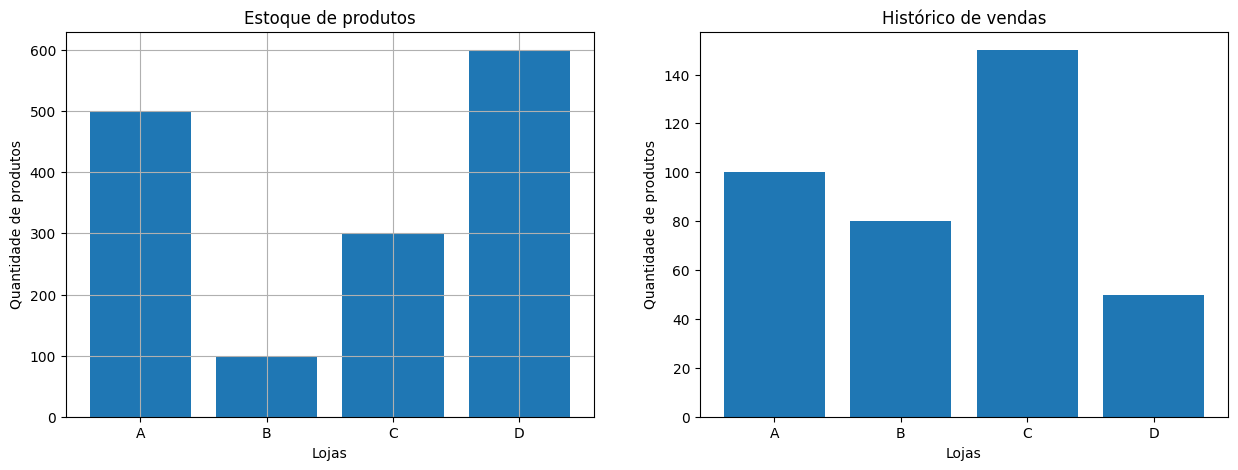

In [74]:
# Criando a figura
fig, axs = plt.subplots(1, 2, figsize=(15,5)) # cria uma figura e armazena na variável axs
# axs - ax - é a abreviação de axes
# s é de subplot 

# Subplot 1: Gráfico de barras
axs[0].bar(df_ecommerce['Lojas_x'], df_ecommerce['Estoque'])
axs[0].set_title('Estoque de produtos')
axs[0].set_xlabel('Lojas')
axs[0].set_ylabel('Quantidade de produtos')

axs[0].grid()
# Subplot 2: Boxplot
axs[1].bar(df_ecommerce['Lojas_x'], df_ecommerce['Jan'])
axs[1].set_title('Histórico de vendas')
axs[1].set_xlabel('Lojas')
axs[1].set_ylabel('Quantidade de produtos')

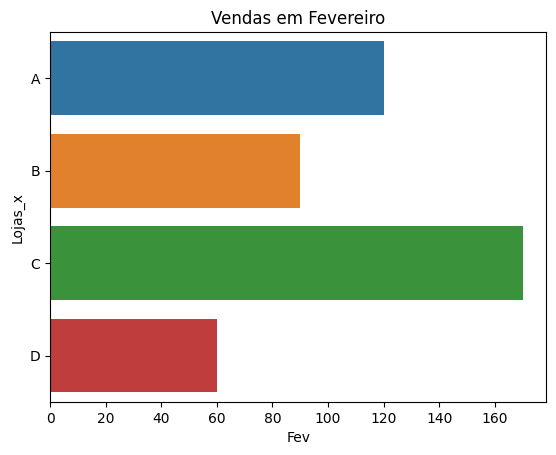

In [75]:
# utiliza a biblioteca seaborn para plotar o gráfico de barras para
#cada loja com a quantidade de vendas no mes de fevereiro
sns.barplot(x='Fev', y='Lojas_x', data=df_ecommerce, orient='h')
plt.title('Vendas em Fevereiro')
plt.show()

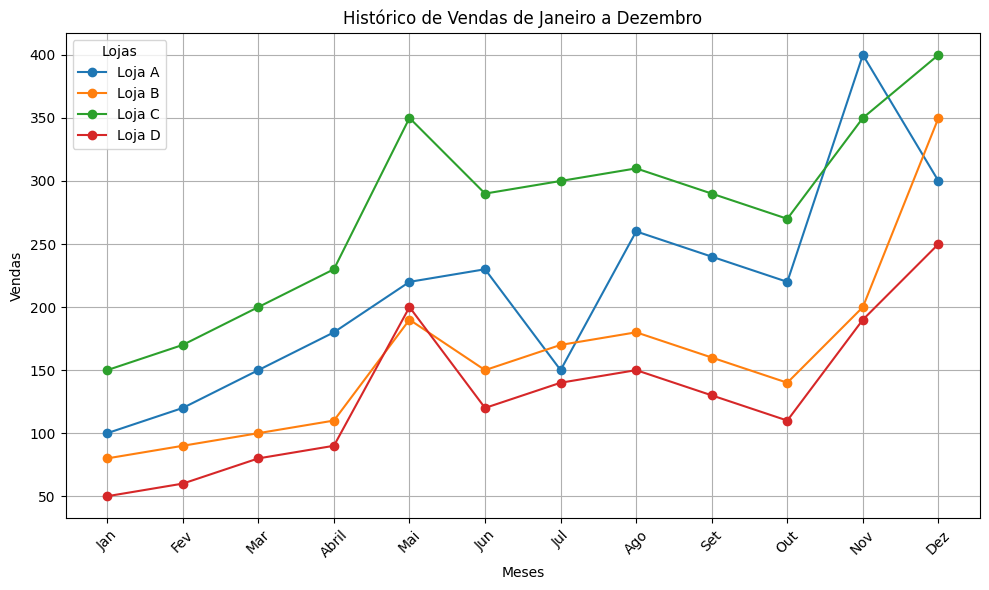

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de vendas
dic_vendas = {
    'Lojas': ['A', 'B', 'C', 'D'],
    
    'Jan': [100, 80, 150, 50],
    'Fev': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Abril': [180, 110, 230, 90],
    'Mai': [220, 190, 350, 200],
    'Jun': [230, 150, 290, 120],
    'Jul': [150, 170, 300, 140],
    'Ago': [260, 180, 310, 150],
    'Set': [240, 160, 290, 130],
    'Out': [220, 140, 270, 110],
    'Nov': [400, 200, 350, 190],
    'Dez': [300, 350, 400, 250],
    'Chave': ['AA', 'BB', 'CC', 'DD']
    
}
df_vendas = pd.DataFrame(dic_vendas)

# Definindo os meses para o eixo x
meses = ['Jan', 'Fev', 'Mar', 'Abril', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',
          'Nov', 'Dez']

# Configurando o gráfico
plt.figure(figsize=(10, 6))

# Iterando por cada loja para plotar seu histórico de vendas
for i, loja in enumerate(df_vendas['Lojas']):
    plt.plot(meses, df_vendas.iloc[i, 1:-1], label=f'Loja {loja}', marker='o')

# Adicionando títulos e rótulos
plt.title('Histórico de Vendas de Janeiro a Dezembro')
plt.xlabel('Meses')
plt.ylabel('Vendas')
plt.legend(title="Lojas")
plt.grid(True)

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()